## Analysis code to generate the figures in the paper

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import *

import scipy.optimize as opt

In [2]:
# Defining saturating function shapes for fitting

def sigmoid2Func(x,a,b):
    return a*(1-np.exp(-b*x**2))

def sigmoid1Func(x,a,b):
    return a*(1-np.exp(-b*x))

def fitSigmoid2(x,y,p0):
    return opt.curve_fit(sigmoid2Func, x, y, p0=p0)

def fitSigmoid1(x,y,p0):
    return opt.curve_fit(sigmoid1Func, x, y, p0=p0)

## Figure 1

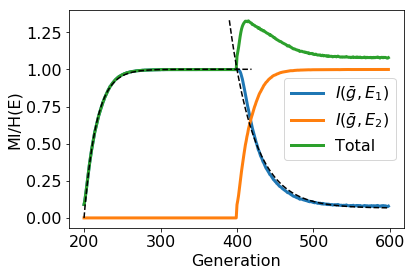

In [454]:
plt.rcParams.update({'font.size': 16})
data = np.loadtxt("results/0.500_0.200.txt")

popt, _ = fitSigmoid1(data[0:200,0], data[0:200,1], p0 = np.array([1, 0.00025]))
popt2, _ = fitSigmoid1(data[200:400,0]-200, 1-data[200:400,1], p0 = np.array([1, 0.00025]))
popt3, _ = fitSigmoid1(data[200:400,0]-200, data[200:400,2], p0 = np.array([1, 0.00025]))

plt.plot(data[:,0]+200, data[:,1], label="$I(\\bar{g},E_1)$", lw=3)
plt.plot(data[:,0]+200, data[:,2], label="$I(\\bar{g},E_2)$", lw=3)
plt.plot(data[:,0]+200, data[:,1] + data[:,2], label="Total", lw=3)

plt.plot(data[:220,0]+200, sigmoid1Func(data[:220,0], popt[0], popt[1]), 'k--',lw=1.5)
plt.plot(data[190:400,0]+200, 1-sigmoid1Func(data[190:400,0]-200, popt2[0], popt2[1]), 'k--',lw=1.5)

plt.ylabel("MI/H(E)")
plt.xlabel("Generation")
plt.legend()
plt.savefig("infodynamics.pdf")

## Figure 2

In [435]:
# Fit time constants and amplitudes for the saturating functions in the $\mu$ variation data

mus = [x for x in np.arange(0.1, 2.1, 0.1)] + \
    [2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.6, 6.0, 6.4] + \
    [6.8, 7.2, 7.6, 8.0, 8.4, 8.8]
    
tc1 = []
tc2 = []
tc3 = []
A1 = []
A2 = []
A3 = []
for mu in mus:
    data = np.loadtxt("results/%.3f_0.200.txt" % (mu))
    popt, _ = fitSigmoid1(data[0:200,0], data[0:200,1], p0 = np.array([1, 0.00025]))
    popt2, _ = fitSigmoid1(data[200:400,0]-200, 1-data[200:400,1], p0 = np.array([1, 0.00025]))
    popt3, _ = fitSigmoid1(data[200:400,0]-200, data[200:400,2], p0 = np.array([1, 0.00025]))
    
    A1.append(popt[0])
    A2.append(popt2[0])
    A3.append(popt3[0])
    
    tc1.append(1/popt[1])
    tc2.append(1/popt2[1])
    tc3.append(1/popt3[1])

A1 = np.array(A1)
A2 = np.array(A2)
A3 = np.array(A3)
tc1 = np.array(tc1)
tc2 = np.array(tc2)
tc3 = np.array(tc3)

In [436]:
# Fit time constants and amplitudes for the saturating functions in the $\Gamma$ variation data

fracs = np.arange(0.05, 1.05, 0.05)
tc1f = []
tc2f = []
tc3f = []
A1f = []
A2f = []
A3f = []
for frac in fracs:
    data = np.loadtxt("results/0.500_%.3f.txt" % (frac))
    popt, _ = fitSigmoid1(data[0:200,0], data[0:200,1], p0 = np.array([1, 0.00025]))
    popt2, _ = fitSigmoid1(data[200:400,0]-200, 1-data[200:400,1], p0 = np.array([1, 0.00025]))
    popt3, _ = fitSigmoid1(data[200:400,0]-200, data[200:400,2], p0 = np.array([1, 0.00025]))
    
    A1f.append(popt[0])
    A2f.append(popt2[0])
    A3f.append(popt3[0])
    
    tc1f.append(1/popt[1])
    tc2f.append(1/popt2[1])
    tc3f.append(1/popt3[1])

A1f = np.array(A1f)
A2f = np.array(A2f)
A3f = np.array(A3f)
tc1f = np.array(tc1f)
tc2f = np.array(tc2f)
tc3f = np.array(tc3f)

In [438]:
# Save time constants for $\mu$ and $\Gamma$ variations

np.savetxt("tcs_mu.txt", np.concatenate([np.array(mus)[:,np.newaxis], tc1[:, np.newaxis], tc2[:, np.newaxis], A1[:, np.newaxis], A2[:, np.newaxis]], axis=1))
np.savetxt("tcs_frac.txt", np.concatenate([np.array(fracs)[:,np.newaxis], tc1f[:, np.newaxis], tc2f[:, np.newaxis], A1f[:, np.newaxis], A2f[:, np.newaxis]], axis=1))

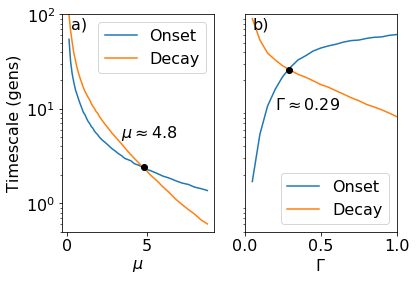

In [418]:
plt.subplot(1,2,1)
plt.plot(mus, tc1, label="Onset")
plt.plot(mus, tc2, label="Decay")
plt.yscale("log")
plt.legend()
plt.xlabel("$\\mu$")
plt.ylabel("Timescale (gens)")
plt.plot(4.8, 2.4, 'ko')
plt.text(3.4, 5, "$\\mu \\approx 4.8$")
plt.text(0.2, 70, "a)")
plt.ylim(0.5,100)

plt.subplot(1,2,2)
plt.plot(fracs, tc1f, label="Onset")
plt.plot(fracs, tc2f, label="Decay")
plt.yscale("log")
plt.legend()
plt.xlabel("$\\Gamma$")
plt.ylim(0.5,100)
plt.xlim(0,1)
plt.yticks([])
plt.plot(0.29, 26, 'ko')
plt.text(0.2, 10, "$\\Gamma \\approx 0.29$")
plt.text(0.05, 70, "b)")
plt.savefig("paramplot.pdf")

## Figure 3

In [421]:
peak20mu = []
peak200mu = []
mus = [x for x in np.arange(0.1, 2.1, 0.1)] + \
    [2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.6, 6.0, 6.4] + \
    [6.8, 7.2, 7.6, 8.0, 8.4, 8.8]

for mu in mus:
    data1 = np.loadtxt("results_oscillate/%.3f_0.200.txt" % mu)
    data2 = np.loadtxt("results/%.3f_0.200.txt" % mu)
    
    peak20mu.append(np.max(data1[:,1] + data1[:,2]))
    peak200mu.append(np.max(data2[:,1] + data2[:,2]))

peak20mu = np.array(peak20mu)
peak200mu = np.array(peak200mu)

In [422]:
peak20f = []
peak200f = []
fracs = np.arange(0.05,1.05,0.05)

for frac in fracs:
    data1 = np.loadtxt("results_oscillate/0.500_%.3f.txt" % frac)
    data2 = np.loadtxt("results/0.500_%.3f.txt" % frac)
    
    peak20f.append(np.max(data1[:,1] + data1[:,2]))
    peak200f.append(np.max(data2[:,1] + data2[:,2]))

peak20f = np.array(peak20f)
peak200f = np.array(peak200f)

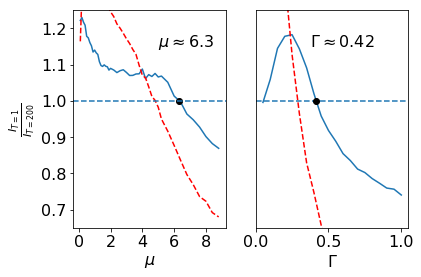

In [440]:
plt.subplot(1,2,1)
plt.plot(mus, peak20mu/peak200mu)

plt.plot(6.3,1.0,'ko')
plt.text(5,1.15,"$\\mu \\approx 6.3$")
plt.axhline(1.0, ls='--')
plt.xlabel("$\\mu$")
plt.ylabel("$\\frac{I_{T=1}}{I_{T=200}}$")
plt.ylim(0.65, 1.25)
plt.xticks([0,2,4,6,8])

plt.subplot(1,2,2)
plt.plot(fracs, peak20f/peak200f)
plt.axhline(1.0, ls='--')
plt.ylim(0.65, 1.25)
plt.yticks([])
plt.plot(0.415, 1.0, 'ko')
plt.text(0.37, 1.15, "$\\Gamma \\approx 0.42$")
plt.xlabel("$\\Gamma$")
plt.savefig("oscillation.pdf")